In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("hoursdata.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

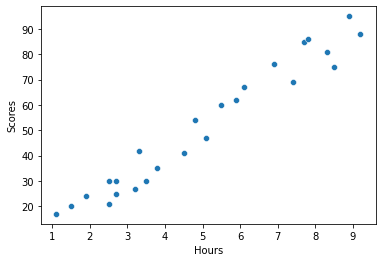

In [4]:
y='Scores'
x='Hours'
sns.scatterplot(y='Scores',x='Hours',data=data)


### There is Positive relationship between Students Scores and no of hr they studied.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

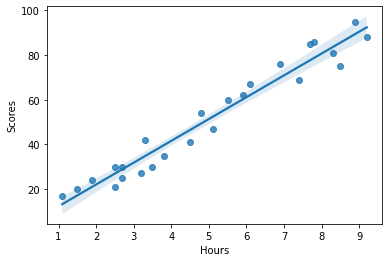

In [5]:
y='Scores'
x='Hours'
sns.regplot(y='Scores',x='Hours',data=data)

### This is the plot for Linear Regression model fit. It means that linear Regression is fits to this data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

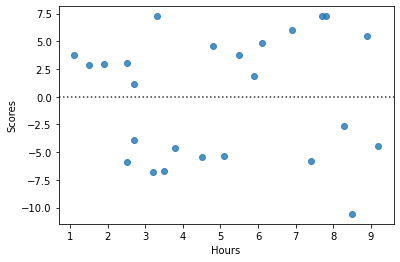

In [6]:
sns.residplot(y='Scores',x='Hours',data=data)

### In the residual plot hours is independent on X_axis and Scores of student is dependent on Y_axis.In this particular plot residuals are equally and randomly spaced around center line Hence Linear Regression is Best Choice.

In [7]:
x=data['Hours']
y=data['Scores']
x= data.iloc[:, :-1].values  
y= data.iloc[:, 1].values  


In [8]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#x_train,x_test,y_train,y_test

In [9]:
#This is library for Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
ypred=model.predict(x_test)
ypred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [11]:
print(model.coef_)   #beta1
# if the no.of hours study is increase by 1 then average scores of the students is also increase by 9.9106

[9.91065648]


In [12]:
print(model.intercept_)   #beta0
# Average Scores of the students is 2.0181 when x=0

2.0181600414346974


In [13]:
import scipy.stats as st

In [14]:
st.t.interval(alpha=0.95,df=len(data)-1,loc=np.mean(data), scale=st.sem(data))

(array([ 3.9696924 , 41.04208596]), array([ 6.0543076 , 61.91791404]))

### In these dataset the no.of hour study of student is lies between the interval(3.96,41.04) and no.of score obtained by studets is lie within the interval (6.04,61.91)

In [16]:
## Calculating R^2 value.
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9454906892105355

### There is 94 % of the variation of the hours variable is explained by the Score variable. 